In [1]:
import sys
sys.path.append(r'C:\Users\festa\OneDrive\Desktop\Thesis\Thesis')
from functions import load_and_process_data, apply_bias_mitigation, evaluate_fairness_metrics, standardize_features, train_classifier_and_find_best_threshold, apply_best_threshold_and_compute_metrics, plot_metrics_dir, plot_metrics_aod, train_classifier_on_transformed_data, extract_fairness_metrics
from functions import train_classifier_with_dir, apply_DIR
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
train, val, test, privileged_groups, unprivileged_groups = load_and_process_data('adult', use_disparate_impact_remover=False)

In [3]:
train_transf, test_transf = apply_bias_mitigation('reweighing', train, test, unprivileged_groups, privileged_groups)


In [4]:
train_before_stat_parity_diff, train_before_disp_impact = evaluate_fairness_metrics(train, unprivileged_groups, privileged_groups, "Train Dataset (Before Transformation)")
test_before_stat_parity_diff, test_before_disp_impact = evaluate_fairness_metrics(test, unprivileged_groups, privileged_groups, "Test Dataset (Before Transformation)")

train_after_stat_parity_diff, train_after_disp_impact = evaluate_fairness_metrics(train_transf, unprivileged_groups, privileged_groups, "Train Dataset (After Transformation)")
test_after_stat_parity_diff, test_after_disp_impact = evaluate_fairness_metrics(test_transf, unprivileged_groups, privileged_groups, "Test Dataset (After Transformation)")

print("Train Dataset (Before Transformation) - Statistical Parity Difference:", train_before_stat_parity_diff)
print("Train Dataset (Before Transformation) - Disparate Impact:", train_before_disp_impact)
print("Test Dataset (Before Transformation) - Statistical Parity Difference:", test_before_stat_parity_diff)
print("Test Dataset (Before Transformation) - Disparate Impact:", test_before_disp_impact)

print("Train Dataset (After Transformation) - Statistical Parity Difference:", train_after_stat_parity_diff)
print("Train Dataset (After Transformation) - Disparate Impact:", train_after_disp_impact)
print("Test Dataset (After Transformation) - Statistical Parity Difference:", test_after_stat_parity_diff)
print("Test Dataset (After Transformation) - Disparate Impact:", test_after_disp_impact)


Train Dataset (Before Transformation) - Statistical Parity Difference: -0.1951
Train Dataset (Before Transformation) - Disparate Impact: 0.3572
Test Dataset (Before Transformation) - Statistical Parity Difference: -0.1893
Test Dataset (Before Transformation) - Disparate Impact: 0.3812
Train Dataset (After Transformation) - Statistical Parity Difference: 0.0000
Train Dataset (After Transformation) - Disparate Impact: 1.0000
Test Dataset (After Transformation) - Statistical Parity Difference: 0.0132
Test Dataset (After Transformation) - Disparate Impact: 1.0546


In [5]:
# Standardize the features (scaling)
train, val, test = standardize_features(train, val, test)

# Choose classifier type
classifier_type = 'logistic_regression'  # Change to 'random_forest' or 'xgboost'

# Train classifier
classifier, best_threshold, best_balanced_acc = train_classifier_and_find_best_threshold(train, val, classifier_type, unprivileged_groups, privileged_groups)


Best Threshold: 0.49
Best Balanced Accuracy: 0.750212927815685


In [6]:
test_metrics, test_scores = apply_best_threshold_and_compute_metrics(classifier, test, best_threshold, unprivileged_groups, privileged_groups)

Balanced Accuracy (test): 0.7291134695746055
Statistical Parity Difference (test): -0.3901722576804888
Disparate Impact (test): 0.2646117486260999
Average Odds Difference (test): -0.33543659515002466
Equal Opportunity Difference (test): -0.361819311591474
Theil Index (test): 0.1158061769334937


In [7]:
%matplotlib inline

c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


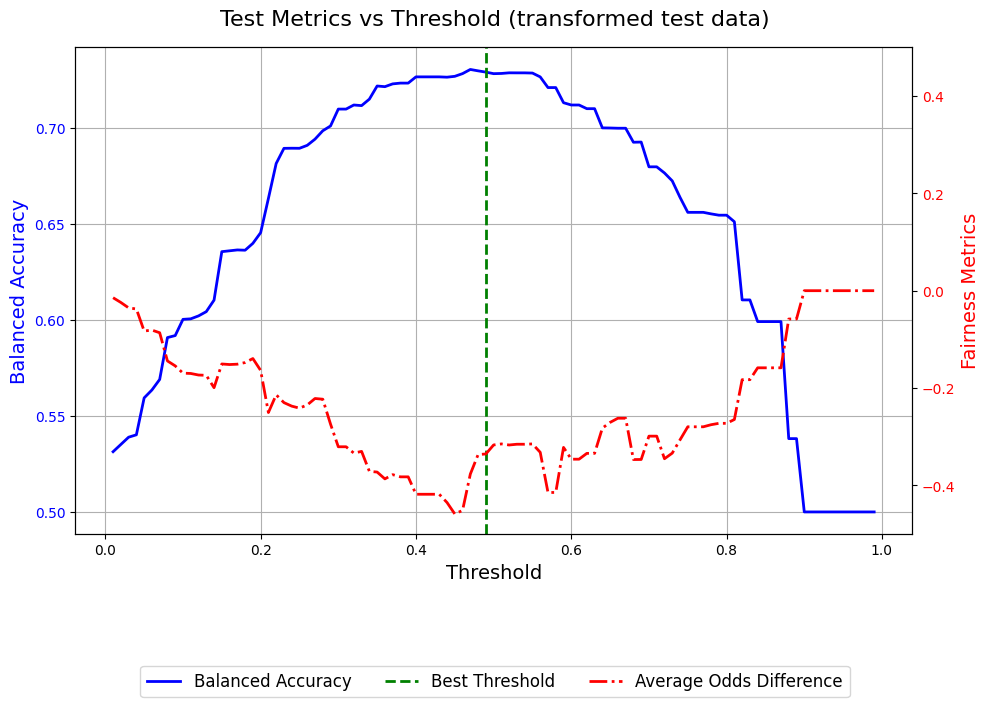

In [8]:
plot_metrics_aod(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)


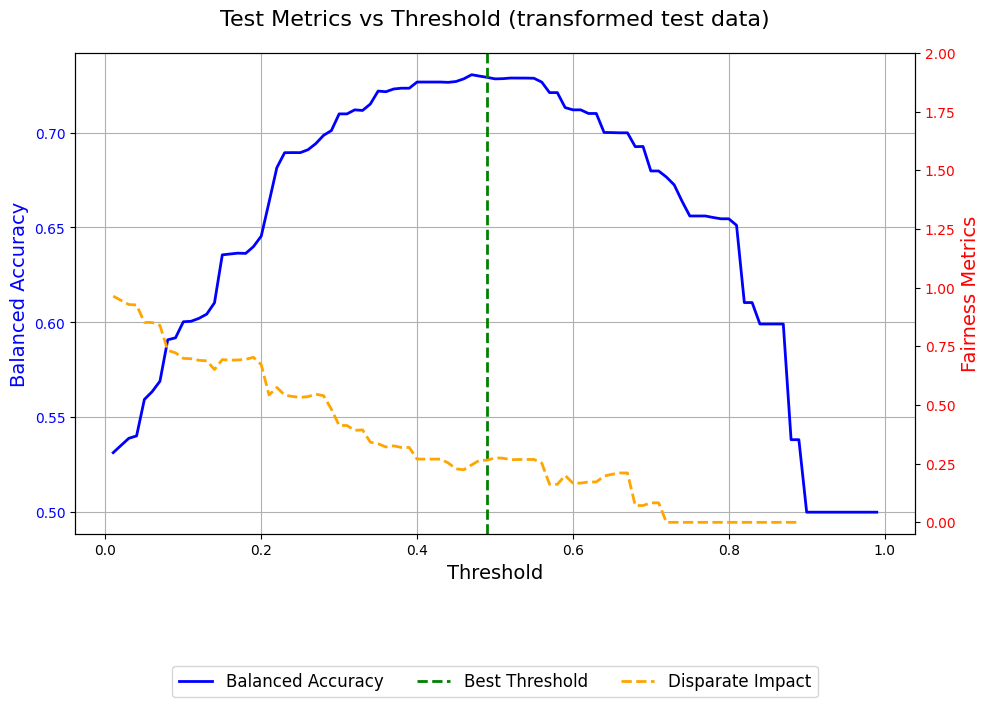

In [9]:
plot_metrics_dir(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)

In [10]:
# Standardize the features (scaling)
train_transf, _ , test_transf = standardize_features(train_transf, val, test_transf)

# Train classifier on transformed data and use the same threshold
classifier_type = 'logistic_regression'  # Change to 'random_forest' or 'xgboost'
test_transf_classifier, test_transf_scores, test_transf_metrics = train_classifier_on_transformed_data(
    train_transf, test_transf, classifier_type, best_threshold, unprivileged_groups, privileged_groups)


Balanced Accuracy (test transformed): 0.7081769627961311
Statistical Parity Difference (test transformed): -0.01689983763551156
Disparate Impact (test transformed): 0.9641345218434764
Average Odds Difference (test transformed): -0.010260078704316722
Equal Opportunity Difference (test transformed): 0.013999774045341695
Theil Index (test transformed): 0.11266386415793568


In [11]:
%matplotlib inline

c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


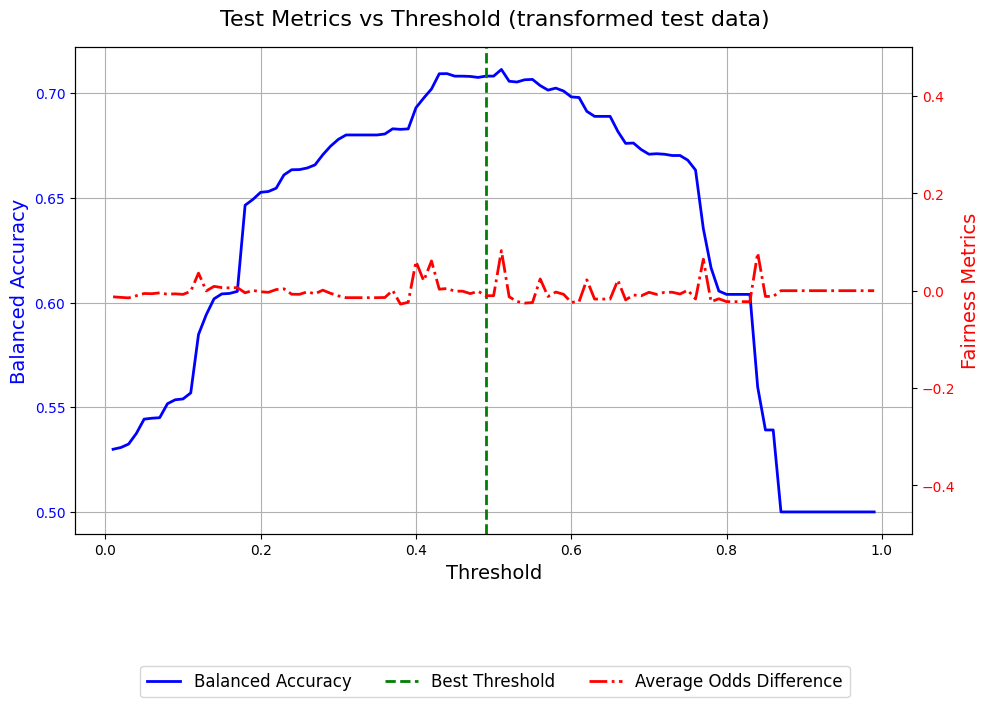

In [12]:
plot_metrics_aod(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

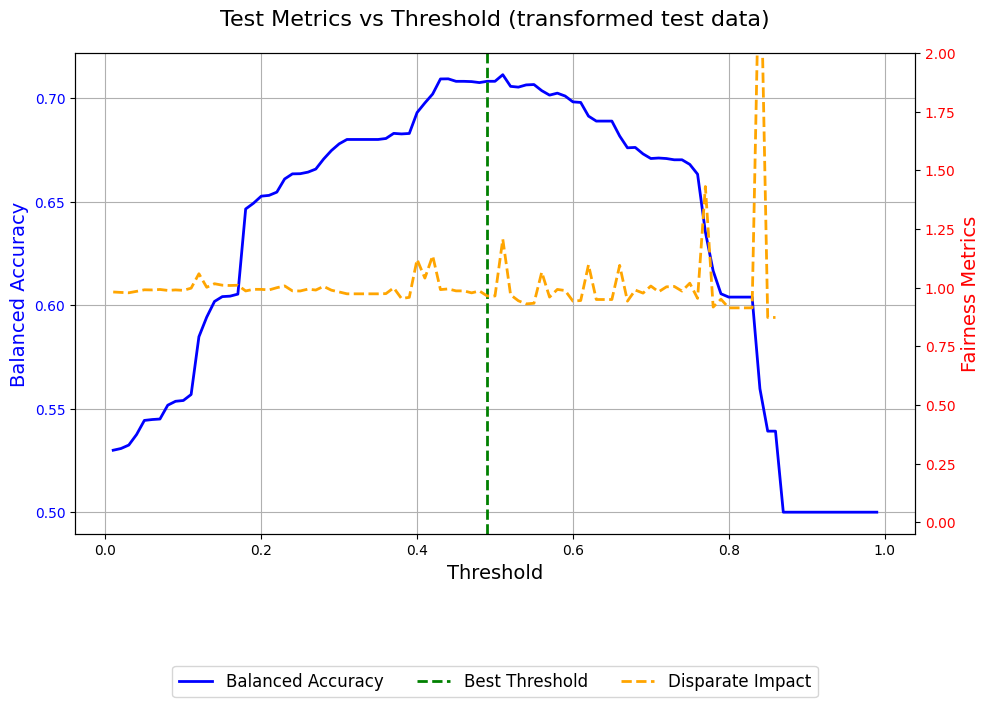

In [13]:
plot_metrics_dir(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

In [14]:
fairness_metrics, validation_metrics, test_metrics = extract_fairness_metrics(
    train_before_stat_parity_diff, train_after_stat_parity_diff,
    test_before_stat_parity_diff, test_after_stat_parity_diff,
    train_before_disp_impact, train_after_disp_impact,
    test_before_disp_impact, test_after_disp_impact,
    best_threshold, best_balanced_acc,
    test_metrics, test_transf_metrics
)

# Displaying the tables
for table in [fairness_metrics, validation_metrics, test_metrics]:
    display(table.name)
    display(table)


'Fairness Metrics Before and After Transformation'

,Dataset,Stage,Metric,Value
0,Train,Before Transformation,Statistical Parity Difference,-0.1951
1,Train,After Transformation,Statistical Parity Difference,0.0000
2,Test,Before Transformation,Statistical Parity Difference,-0.1893
3,Test,After Transformation,Statistical Parity Difference,0.0132
4,Train,Before Transformation,Disparate Impact,0.3572
5,Train,After Transformation,Disparate Impact,1.0000
6,Test,Before Transformation,Disparate Impact,0.3812
7,Test,After Transformation,Disparate Impact,1.0546


'Validation Metrics for Threshold Selection'

,Dataset,Stage,Metric,Value
0,Validation,Best Threshold (Validation),Threshold,0.490000
1,Validation,Best Threshold (Validation),Balanced Accuracy,0.750213


'Test Metrics After Applying Threshold On Original and Transformed'

,Dataset,Stage,Metric,Value
0,Test (Original),After Threshold,Balanced Accuracy,0.729113
1,Test (Transformed),After Threshold,Balanced Accuracy,0.708177
2,Test (Original),After Threshold,Statistical Parity Difference,-0.390172
3,Test (Transformed),After Threshold,Statistical Parity Difference,-0.016900
4,Test (Original),After Threshold,Disparate Impact,0.264612
5,Test (Transformed),After Threshold,Disparate Impact,0.964135
6,Test (Original),After Threshold,Average Odds Difference,-0.335437
7,Test (Transformed),After Threshold,Average Odds Difference,-0.010260
8,Test (Original),After Threshold,Equal Opportunity Difference,-0.361819
9,Test (Transformed),After Threshold,Equal Opportunity Difference,0.014000
